# From Linear Algebra to Linear Regression

## Linear Algebra

It is a branch of mathematics concerning linear equations such as:
$$ a_1x_1 +  \dots + a_nx_n $$
linear maps such as:
$$ (x_1,\dots,x_n) \mapsto a_1x_1 + \dots + a_nx_n $$
and their represenations in vector spaces through matrices such as:
\begin{bmatrix}
a_11 & a_12 & a_13\\
a_21 & a_22 & a_23\\
\vdots & \vdots & \vdots\\
a_m1 & a_m2 & a_m3
\end{bmatrix}

### Design Matrix

A _design matrix_ (often denoted as $X$) is a fundamental concept in statistics and machine learning, particularly in the context of linear regression and other linear models.  It is a matrix that organizes the data in a way that facilitates the application of linear models.

#### Key Components of a Design Matrix

1. Rows: Each row in the design matrix represents a single observation or data point.
2. Columns: Each column represents a feature or predictor variable.  The columns may include:
- Independent Variables: The features used to predict the dependent variable.
- Intercept Term: A column of ones(if included)to account for the intercept term in the linear model.
- Interaction Terms: Columns representing interactions between features.
- Polynomial Terms: Columns representing higher-order terms of the features.

#### Structure of a Design Matrix

For a dataset with $n$ observations and $p$ features, the design matrix $X$ is an $n\times(p+1)$ matrix (if an intercept term is included).  The structure is as follows:

$$
X=
\begin{bmatrix}
1&x{11}&x{12}&\dots&x{1p}\\
1&x{21}&x{22}&\dots&x{2p}\\
\vdots&\vdots&\vdots&\ddots&\vdots\\
1&x{n1}&x{n2}&\dots&x{np}\\
\end{bmatrix}
$$

- The first column(all ones)represents the intercept term.
- The remaining columns represent the features $x{ij}$, where $i$ is the observation index and $j$ is the feature index.

#### Example

Consider a simple dataset with 3 observations and 2 features(`Length`and`Width`):

| Observation |	 Length  |	 Width |
|-------------|----------|---------|
| 1           |	 1       |	 2     |	
| 2           |	 2       |	 3     |	
| 3           |	 3       |	 4     |	



The design matrix\(X\)(including an intercept term)would be:

$$
X=
\begin{bmatrix}
1&1&2\\
1&2&3\\
1&3&4\\
\end{bmatrix}
$$


#### Importance of the Design Matrix

1. Linear Regression: In linear regression,the design matrix $X$ is used to compute the model coefficients $\beta$ using the formula:
    $\hat{\beta}=(X^T X)^{-1}X^T y$ where $y$ is the vector of dependent variable values.
2. Generalized Linear Models(GLMs): The design matrix is also used in GLMs, where it helps transform the linear predictor into the response variable through a link function.
3. Feature Engineering: The design matrix can include polynomial terms, interaction terms,and other transformations of the original features to capture more complex relationships.
4. Model Interpretation: The columns of the design matrix correspond directly to the features in the model, making it easier to interpret the coefficients.

#### Example

```python
import numpy as np
import pandas as pd

# Sample data
data = {
    'Length1': [1, 2, 3],
    'Width': [2, 3, 4]
}
df = pd.DataFrame(data)

# Add an intercept term (column of ones)
df['Intercept'] = 1

# Create the design matrix
X = df[['Intercept', 'Length1', 'Width']]

print("Design Matrix:\n", X)
```

#### Output

```
Design Matrix:
   Intercept  Length1  Width
0          1        1      2
1          1        2      3
2          1        3      4
```



#### Summary
- A design matrix is a structured representation of the data used in linear models.
- It includes columns for the intercept term,independent variables,and possibly interaction or polynomial terms.
- It is essential for fitting linear regression models and other linear models,as well as for interpreting the results.

## Linear Regression
Regression is a staticall method used to model and analyze the relationship between a dependen variable (target) and one of more independent variables (predictors).

Linear regression is a technique used to determine the best-fitting line (or hyperplaine for multiple variables) that descries the relationship between independent variables and the dependent variable.  The goal is to minimize the difference (error) between the actual and the predicted values.

A __simple linear regression__ is represented as:

$$ y = \beta_0 + \beta_1x + \epsilon $$

Where:

- y is athe dependent variable (target)
- x is the independent variable (predictor)
- $\beta_0$ is the y-intercept (see below)
- $\beta_1$ is the slope (coefficient - see below)
- $\epsilon$ is the error term

For __multiple linear regression__, the equation extends to:

$$ y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n + \epsilon $$

Where multiple independent variables (x_1, x_2, $\dots$, x_n) influence the dependent variable.

The __goal of linear regression__ is to estimate the coefficients (\beta) in such a way that the sum of squared errors (differences between actual and predicted values) is minimized, which is often done using __Ordinary Least Squares (OLS).__

### Intercept and Coefficient

In a Linear Regression model, the intercept and coefficients are fundamental components that define the linear relationship.

### Intercept ($\beta_0$ or bias)
   - It is the value of the dependent variable $(y)$ when all the independent varialbes $(x)$ are *zero*
   - It represents the starting point ($x=0$ of the regression line on the $y-axis$
   - It can be obtained from the model object: $model.intercept\_$

#### Example

Suppose we model house prices (y) based on the size of the house (x):

$ price = 50,000 + 200 \times size $

Where: 50,000 is the intercept, meaning when the house is of size zero, the land costs $50,000

  
### Coefficient ($\beta_1, \beta_2$ or weight)

   - It is the _slope_ which represents the change in the dependent variable $(y)$ for a one-unit change in the independent variable $(x)$, assuming all the other variables remain constant.
   - It can be obtained from the model object: $model.coef\_$)
   - $(x)$ is called a feature in machine learning

Given:

$ y = model.intercept\_ + (model.coef_0 \times Feature1) + (model.coef_1 \times Feature2) $

Where:
- $y$ is the prediction
  
When:
- $intercept = 2$
- $coefficient_0 = 3$
- $coefficient_1 = 4$

Then:
- When all features are 0, prediction = 2, which is the intercept or $\beta_0$ or bias
- For each unit increase in Feature1, prediction (y) increases by 3
- For each unit increase in Feature2, prediction increases by 4

#### Example

Using the same house price model:

$ price = 50,000 + 200 \times size $

Where:
the coefficient 200 means that for every additional square foot, the price incereases by \$200.
- A positive coefficient means that as $x$ increases, $y$ also increases.
- A negative coefficient means that as $x$ increases, $y$ decreases.

### Covariance (of the Coefficient) and Uncertainty

he uncertainty in the coefficients can be quantified using the covariance matrix of the coefficients. For a linear regression model, the covariance matrix of the coefficients is given by:

$$\text{Cov}(\hat{\beta}) = \sigma^2 (X^T X)^{-1}$$

where:
- $\sigma^2$ is the variance of the residuals.
- $X$ is the design matrix.
- $\hat{\beta}$ is the vector of estimated coefficient.

The variance of the residuals ($\sigma^2$) can be calculated as:

$$\sigma^2 = \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{n - p}$$

where:
- $y_i$ is the observed value.
- $\hat{y}_i$ is the predicted value.
- $n$ is the number of observations.
- $p$ is the number of parameters (including the intercept).

The inverse of the matrix $X^T X$ can be obtained by using NumPy's `np.linalg.inv()` function.


In [26]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Sample data
data = {
    'Length1': [1, 2, 3, 4, 5],
    'Width': [2, 3, 4, 5, 6],
    'Height': [3, 4, 5, 6, 7],
    'Weight': [10, 15, 20, 25, 30]
}
df = pd.DataFrame(data)

# Split the data into training and testing sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Design matrix and target variable
X = np.array(train[['Length1', 'Width', 'Height']])
y = train['Weight']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Model coefficients
print("Model coefficients:", model.coef_)

# Calculate the variance of the residuals
y_pred = model.predict(X)
residuals = y - y_pred
sigma2 = np.sum(residuals**2) / (len(y) - X.shape[1] - 1)
print("Variance of the residuals:", sigma2)

# Calculate the inverse of X^T X
X_T_X_inv = np.linalg.inv(np.dot(X.T, X))

# Calculate the covariance matrix of the coefficients
cov_matrix = sigma2 * X_T_X_inv
print("Covariance matrix of the coefficients:\n", cov_matrix)

# Generate multiple sets of coefficients from a multivariate normal distribution
num_samples = 1000
coefficients_samples = multivariate_normal.rvs(mean=model.coef_, cov=cov_matrix, size=num_samples)

# Use the generated coefficients to make predictions
X_test = np.array(test[['Length1', 'Width', 'Height']])
y_pred_samples = np.dot(X_test, coefficients_samples.T)

# Calculate the mean and standard deviation of the predictions
y_pred_mean = np.mean(y_pred_samples, axis=1)
y_pred_std = np.std(y_pred_samples, axis=1)

# Plot the predictions with uncertainty
plt.errorbar(y_pred_mean, test['Weight'], xerr=y_pred_std, fmt='o', color='blue', ecolor='lightgray', capsize=5)
plt.xlabel('Predicted Weight')
plt.ylabel('Actual Weight')
plt.title('Predictions with Uncertainty')
plt.show()

Model coefficients: [1.66666667 1.66666667 1.66666667]
Variance of the residuals: inf
Covariance matrix of the coefficients:
 [[-inf  inf -inf]
 [ inf -inf  inf]
 [-inf  inf -inf]]


/var/folders/1y/b_fbg_px6rz7r15bg95r0wfc0000gn/T/ipykernel_69831/1774101341.py:34: RuntimeWarning: divide by zero encountered in scalar divide
  sigma2 = np.sum(residuals**2) / (len(y) - X.shape[1] - 1)


ValueError: array must not contain infs or NaNs

#### Logarithm
logarithm, the exponent or power to which a base must be raised to yield a given number. 
Expressed mathematically, x is the logarithm of n to the base b if $b^x$ = n, in which case one 
writes: 
$$x = log_b n$$

For example, $2^3 = 8$; therefore, 3 is the logarithm of 8 to base 2, or $3 = log_2 8$


#### Salary, a Logarithm Example
If you are predicting salary from years of experience.
Doubling the “years of experience” might add $10,000.
This is linear in the log of the “years of experience”.
So feature engineer and create a column with the log of the years
of experience, and use that column instead.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Simulated data
years_experience = np.array([1, 2, 4, 8, 16, 32])
salary = np.array([40000, 50000, 60000, 70000, 80000, 90000])

# Log transform
log_years_experience = np.log(years_experience)
# print(f"Log years_of_experience: {log_years_experience}")

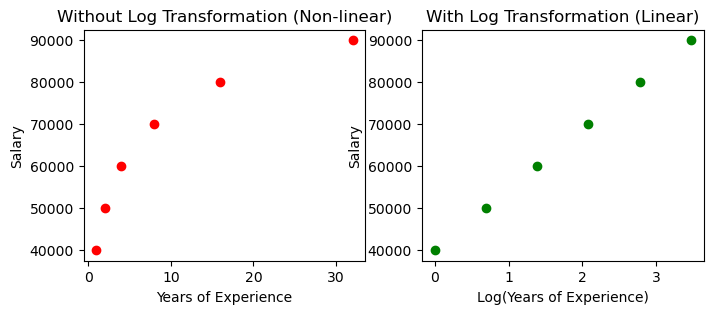

In [14]:
# Plot original relationship
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.scatter(years_experience, salary, color='red')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Without Log Transformation (Non-linear)")

# Plot log-transformed relationship
plt.subplot(1,2,2)
plt.scatter(log_years_experience, salary, color='green')
plt.xlabel("Log(Years of Experience)")
plt.ylabel("Salary")
plt.title("With Log Transformation (Linear)")

plt.show()

In [81]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Sample dataset
data = {'YearsExperience': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Salary': [40000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000]}
print(data)

{'YearsExperience': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'Salary': [40000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000]}


In [89]:
# Convert to DataFrame
df = pd.DataFrame(data)
# print(df)

# Feature engineering: add log-transformed experience column
df['Log_YearsExperience'] = np.log(df['YearsExperience'])

# Define features (using log of experience) and target
X = df[['Log_YearsExperience']]
# print(X)

y = df['Salary']
# print(y)

In [91]:
# Train a simple linear regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)
# print(X_test)
# print(y_pred)

In [87]:
# Print model coefficient and intercept
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: 35318.115224151945
Coefficient: 20669.251235270036


In [151]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared_score = r2_score(y_test, y_pred)
print(f"mae: {"{:.2f}".format(mae)}, mse: {"{:.2f}".format(mse)}, r_squared_score: {"{:.2f}".format(r_squared_score)}")

mae: 2310.97, mse: 9166239.93, r_squared_score: 0.97


#### Mean Absolute Error (MAE)

$$MAE = \frac{1}{n} \sum_{k=1}^n |y_i - \hat{y}_i|$$

- Measures the average absolute difference between the actual values (y_i) and predicted values (ŷ_i).
- Doesn’t penalize large errors as much as MSE.

#### Mean Squared Error (MSE)

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

- Similar to MAE but squares the errors, making larger errors more impactful.

#### R Squared(Coefficient of Determination)

\begin{equation*}
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
\end{equation*}

Where:
- $y_i$  → Actual (observed) value of the dependent variable for the $i$-th data point.
- $\hat{y}_i$  → Predicted value from the model for the  $i$-th data point.
- $\bar{y}$  → Mean (average) of all actual values in the dataset.

Interpretation:
- It measures how well the model explains variance in the data.
- R² = 1 → Perfect model.
- R² = 0 → Model is as bad as predicting the mean.
- R² < 0 → Model is worse than just using the average.
- Example: If R² = 0.85, the model explains 85% of the variance in the target variable.


#### Loss Function

Logistic Loss Function (cross-entropy)

Logistic Regression: the goal is to use gradient descent to minimize cross-entropy

<pre>
TODO Further explain with coding example
</pre>